# House Price Prediction Regression Project

## Project Goal

## Load Modules/Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler

## Load Dataset

In [2]:
train_data_path = r"S:\Projects\House_Price_Prediction\data\train.csv"
test_data_path = r"S:\Projects\House_Price_Prediction\data\test.csv"

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

print("Shape of train: ", df_train.shape)
print("Shape of test: ", df_test.shape)

Shape of train:  (1460, 81)
Shape of test:  (1459, 80)


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

## Know your data

## Data Integration

In [6]:
df = pd.concat([df_train, df_test])

print("Shape of Integrated Data / DF: ", df.shape)

Shape of Integrated Data / DF:  (2919, 81)


In [7]:
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
df.tail(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1455          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1456          1996     Gable  CompShg     VinylSd     VinylSd        NaN   
1457          1992     Gable  CompShg     HdBoard     Wd Shng        NaN   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1454         0.0        TA        TA     CBlock       TA       TA   
1455         0.0        TA        TA     CBlock       TA       TA   
1456         0.0        TA        TA     CBlock       TA       TA   
1457         0.0        TA        TA      PConc       Gd       TA   
1458        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454           No          Unf         0.0          Unf         0.0   
1455           No          Rec       252.0          Unf         0.0   
1456           No          ALQ      1224.0          Unf         0.0   
1457           Av          GLQ       337.0          Unf         0.0   
1458           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1454      546.0        546.0    GasA        Gd          Y      SBrkr   
1455      294.0        546.0    GasA        TA          Y      SBrkr   
1456        0.0       1224.0    GasA        Ex          Y      SBrkr   
1457      575.0        912.0    GasA        TA          Y      SBrkr   
1458      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454       546       546             0       1092           0.0           0.0   
1455       546       546             0       1092           0.0           0.0   
1456      1224         0             0       1224           1.0           0.0   
1457       970         0             0        970           0.0           1.0   
1458       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1454         1         1             3             1          TA   
1455         1         1             3             1          TA   
1456         1         0             4             1          TA   
1457         1         0             3             1          TA   
1458         2         1             3             1          TA   

   

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [10]:
int_features = df.select_dtypes(include=["int64"]).columns

print("Total number of integer features: ", int_features.shape[0])
print("List of integer features: ", int_features.tolist())

Total number of integer features:  26
List of integer features:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [11]:
float_features = df.select_dtypes(include = ["float64"]).columns

print("Total number of float features: ", float_features.shape[0])
print("List of float features: ", float_features.tolist())

Total number of float features:  12
List of float features:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [12]:
category_features = df.select_dtypes(include = ["object"]).columns

print("Total number of categorical features: ", category_features.shape[0])
print("List of categorical features: ", category_features.tolist())

Total number of categorical features:  43
List of categorical features:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Get the Statistical Information of Numerical Features

In [13]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

## Handling Missing Values

### Visualising Null/Missing Values

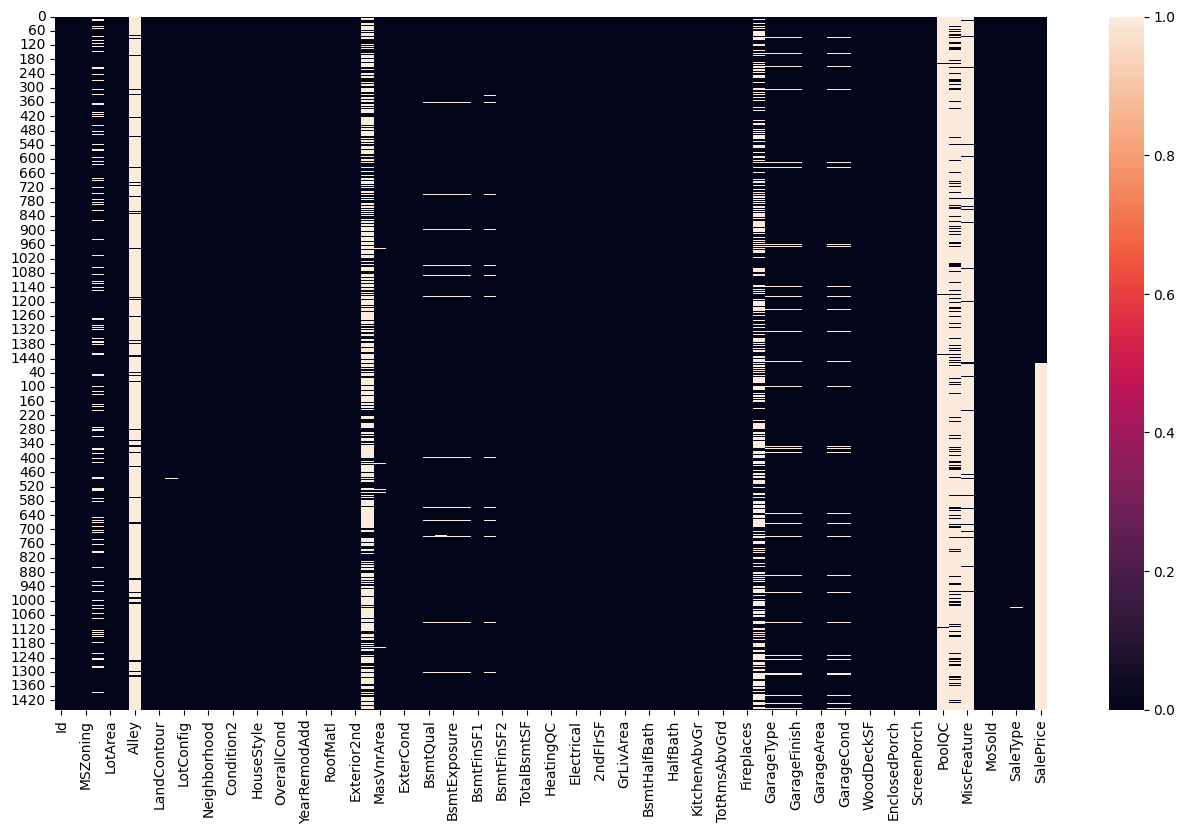

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_df_of_null.png")

### Get Null Value Percentage for every Features

In [15]:
# Set index as ID column
df = df.set_index("Id")

In [16]:
null_count = df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [17]:
null_percent = df.isnull().sum()/df.shape[0] * 100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

### Drop Columns/Features
As per observation we will not drop any features from dataset

In [18]:
""" As per domain knowledge we will not drop features, instead we will add constant value NA """
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [19]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [20]:
""" As per domain knowledge we will not drop FireplaceQu features, instead we will add constant value NA """
miss_value_20_50_perc = null_percent[(null_percent > 20) & (null_percent < 50)]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [21]:
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 20)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

<Axes: ylabel='Id'>

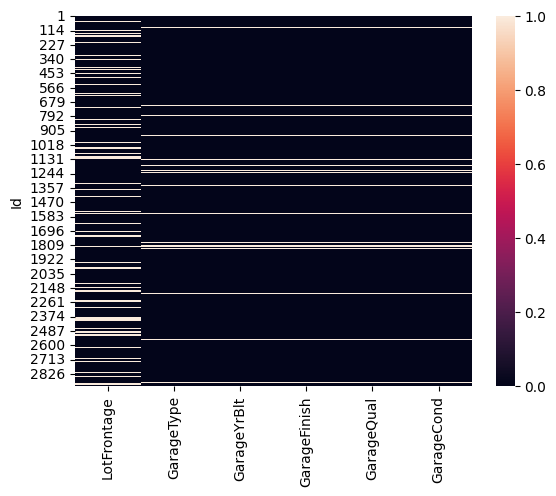

In [22]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

## Missing Value Imputation

In [23]:
missing_value_features = null_percent[null_percent > 0]
print("Total number of missing value features = ", len(missing_value_features))
missing_value_features

Total number of missing value features =  35


MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [24]:
missing_categorical_features = missing_value_features[missing_value_features.keys().isin(category_features)]
print("Total number of missing categorical value features = ", len(missing_categorical_features))
missing_categorical_features

Total number of missing categorical value features =  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [25]:
missing_integer_features = missing_value_features[missing_value_features.keys().isin(int_features)]
print("Total number of missing integer value features = ", len(missing_integer_features))
missing_integer_features

Total number of missing integer value features =  0


Series([], dtype: float64)

In [26]:
missing_float_features = missing_value_features[missing_value_features.keys().isin(float_features)]
print("Total number of missing float value features = ", len(missing_float_features))
missing_float_features

Total number of missing float value features =  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

### Handling MSZoning = 0.137033

In [27]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='MSZoning', ylabel='count'>

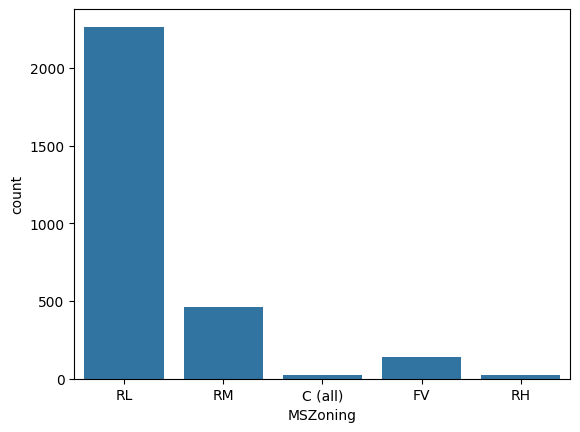

In [28]:
sns.countplot(x = "MSZoning", data = df)

In [29]:
# Backup of original data
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [30]:
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"] = df_mvi["MSZoning"].fillna(mszoning_mode)
df_mvi["MSZoning"].isnull().sum()

0

In [31]:
def oldNewCountPlot(df, df_new, feature):
    plt.subplot(121)
    sns.countplot(x = feature, data = df)
    plt.title("Old Data Distribution")
    plt.subplot(122)
    sns.countplot(x = feature, data = df_new)
    plt.title("New Data Distribution")

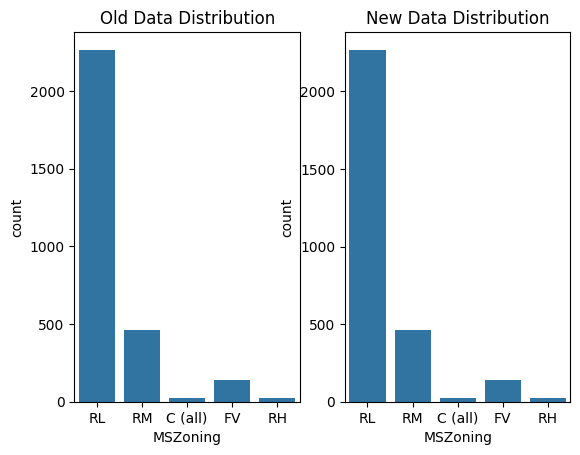

In [32]:
oldNewCountPlot(df, df_mvi, "MSZoning")

### Handling LotFrontage = 16.649538

In [33]:
def boxDistPlot(df, figsize=(16, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(x=df)
    plt.subplot(122)
    sns.histplot(df, kde=True)

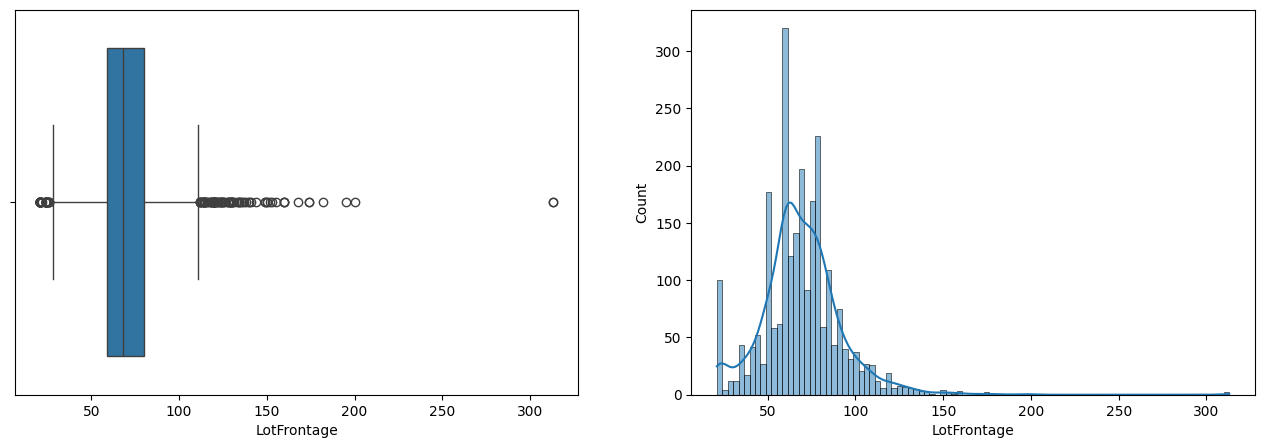

In [34]:
boxDistPlot(df["LotFrontage"])

In [35]:
lotfrontage_median = df["LotFrontage"].median()
df_mvi["LotFrontage"] = df_mvi["LotFrontage"].fillna(lotfrontage_median)
df_mvi["LotFrontage"].isnull().sum()

0

In [36]:
def oldNewBoxDistPlot(df, df_new, feature, figsize=(16, 10)):
    plt.figure(figsize=figsize)
    
    plt.subplot(221)
    sns.boxplot(x=df[feature])
    plt.title("Old Data Distribution - Boxplot")
    
    plt.subplot(222)
    sns.histplot(df[feature], kde=True)
    plt.title("Old Data Distribution - Histogram")
    
    plt.subplot(223)
    sns.boxplot(x=df_new[feature])
    plt.title("New Data Distribution - Boxplot")
    
    plt.subplot(224)
    sns.histplot(df_new[feature], kde=True)
    plt.title("New Data Distribution - Histogram")

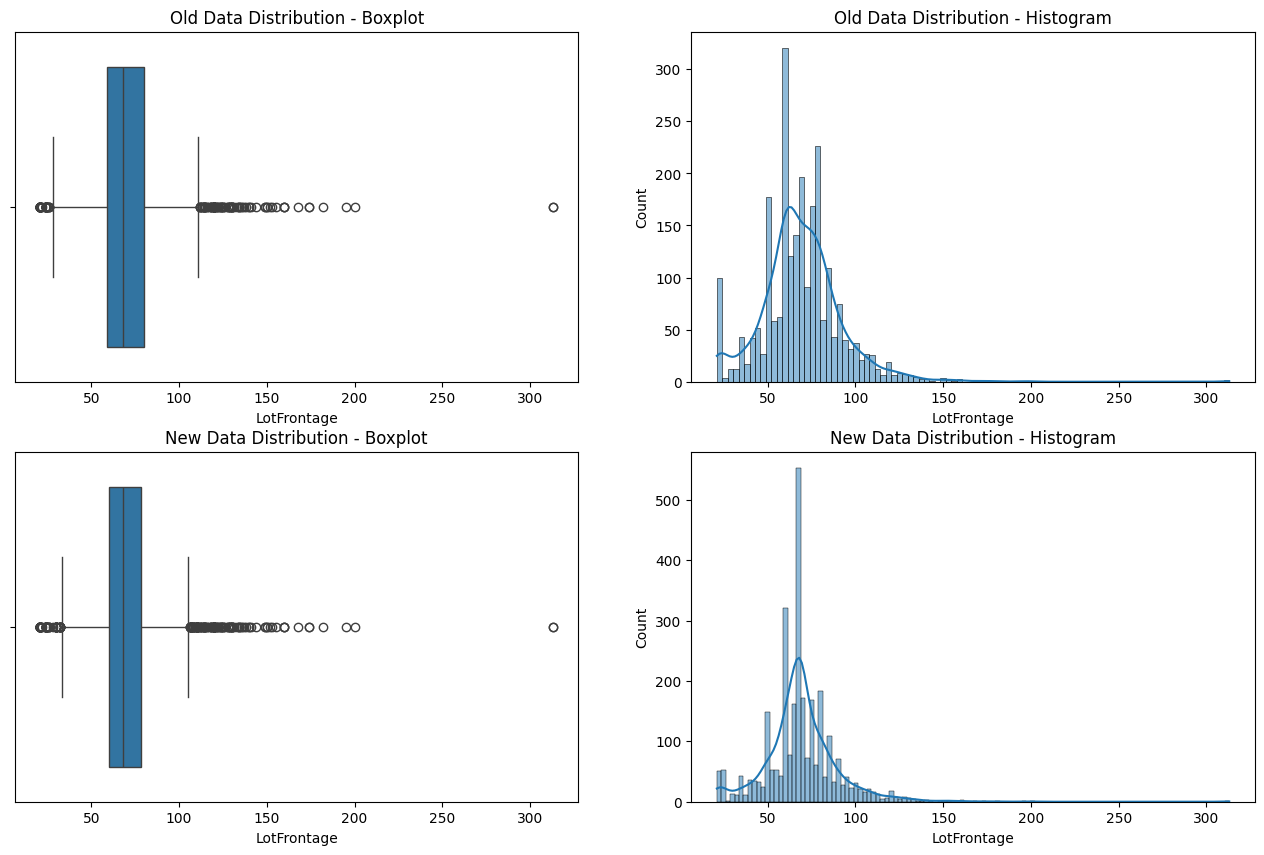

In [37]:
oldNewBoxDistPlot(df, df_mvi, "LotFrontage")

### Handling Alley = 93.216855

In [38]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

<Axes: xlabel='Alley', ylabel='count'>

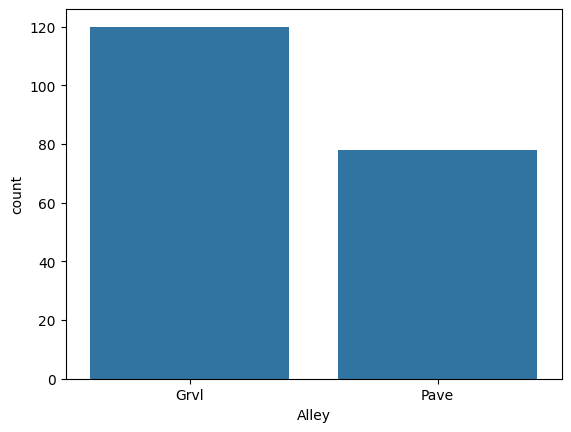

In [39]:
sns.countplot(x = "Alley", data = df)

In [40]:
alley_const = "NA"
df_mvi["Alley"] = df_mvi["Alley"].fillna(alley_const)
df_mvi["Alley"].isnull().sum()

0

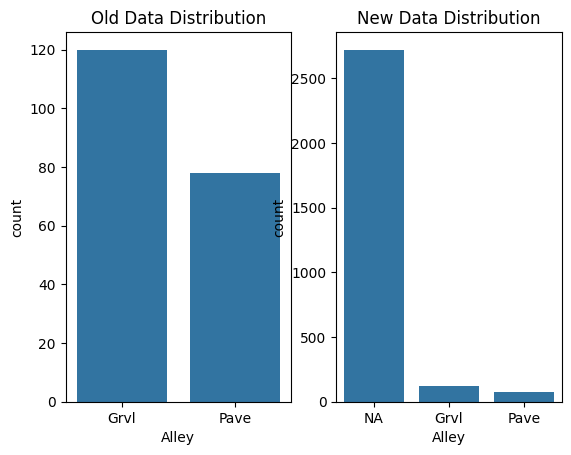

In [41]:
oldNewCountPlot(df, df_mvi, "Alley")

### Handeling Utilites = 0.068517

In [42]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [43]:
utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"] = df_mvi["Utilities"].fillna(utilities_mode)
df_mvi["Utilities"].isnull().sum()

0

### Handeling Exterior1st = 0.034258  Exterior2nd = 0.034258

In [44]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [45]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [46]:
exterior1st_mode = df["Exterior1st"].mode()[0]
exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"] = df_mvi["Exterior1st"].fillna(exterior1st_mode)
df_mvi["Exterior2nd"] = df_mvi["Exterior2nd"].fillna(exterior2nd_mode)
print("Exterior1st null :", df_mvi["Exterior1st"].isnull().sum())
print("Exterior2nd null :", df_mvi["Exterior2nd"].isnull().sum())

Exterior1st null : 0
Exterior2nd null : 0


### Handling MasVnrType = 60.500171 MasVnrArea = 0.787941

<Axes: ylabel='Id'>

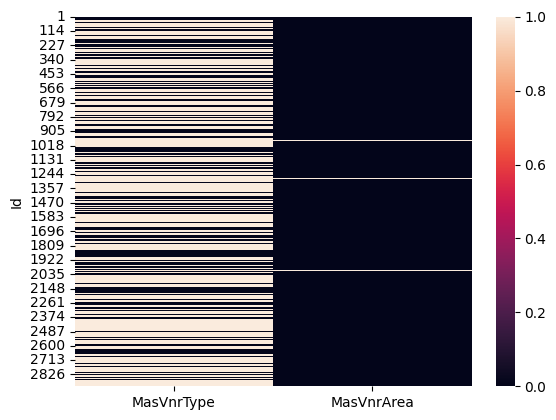

In [47]:
sns.heatmap(df[["MasVnrType", "MasVnrArea"]].isnull())

In [48]:
df[df[["MasVnrType", "MasVnrArea"]].isnull().any(axis=1)]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
2             20       RL         80.0     9600   Pave   NaN      Reg   
4             70       RL         60.0     9550   Pave   NaN      IR1   
6             50       RL         85.0    14115   Pave   NaN      IR1   
9             50       RM         51.0     6120   Pave   NaN      Reg   
10           190       RL         50.0     7420   Pave   NaN      Reg   
11            20       RL         70.0    11200   Pave   NaN      Reg   
13            20       RL          NaN    12968   Pave   NaN      IR2   
16            45       RM         51.0     6120   Pave   NaN      Reg   
18            90       RL         72.0    10791   Pave   NaN      Reg   
19            20       RL         66.0    13695   Pave   NaN      Reg   
20            20       RL         70.0     7560   Pave   NaN      Reg   
22            45       RM         57.0     7449   Pave  Grvl      Reg   
24           120       RM         44.0     4224   Pave   NaN      Reg   
25            20       RL          NaN     8246   Pave   NaN      IR1   
27            20       RL         60.0     7200   Pave   NaN      Reg   
29            20       RL         47.0    16321   Pave   NaN      IR1   
30            30       RM         60.0     6324   Pave   NaN      IR1   
31            70  C (all)         50.0     8500   Pave  Pave      Reg   
32            20       RL          NaN     8544   Pave   NaN      IR1   
33            20       RL         85.0    11049   Pave   NaN      Reg   
34            20       RL         70.0    10552   Pave   NaN      IR1   
37            20       RL        112.0    10859   Pave   NaN      Reg   
39            20       RL         68.0     7922   Pave   NaN      Reg   
40            90       RL         65.0     6040   Pave   NaN      Reg   
42            20       RL        115.0    16905   Pave   NaN      Reg   
43            85       RL          NaN     9180   Pave   NaN      IR1   
44            20       RL          NaN     9200   Pave   NaN      IR1   
45            20       RL         70.0     7945   Pave   NaN      Reg   
47            50       RL         48.0    12822   Pave   NaN      IR1   
48            20       FV         84.0    11096   Pave   NaN      Reg   
49           190       RM         33.0     4456   Pave   NaN      Reg   
50            20       RL         66.0     7742   Pave   NaN      Reg   
51            60       RL          NaN    13869   Pave   NaN      IR2   
52            50       RM         52.0     6240   Pave   NaN      Reg   
53            90       RM        110.0     8472   Grvl   NaN      IR2   
54            20       RL         68.0    50271   Pave   NaN      IR1   
55            80       RL         60.0     7134   Pave   NaN      Reg   
58            60       RL         89.0    11645   Pave   NaN      IR1   
60            20       RL         60.0     7200   Pave   NaN      Reg   
61            20       RL         63.0    13072   Pave   NaN      Reg   
62            75       RM         60.0     7200   Pave   NaN      Reg   
64            70       RM         50.0    10300   Pave   NaN      IR1   
69            30       RM         47.0     4608   Pave   NaN      Reg   
70            50       RL         81.0    15593   Pave   NaN      Reg   
72            20       RL         69.0     7599   Pave   NaN      Reg   
75            50       RM         60.0     5790   Pave   NaN      Reg   
76           180       RM         21.0     1596   Pave   NaN      Reg   
77            20       RL          NaN     8475   Pave   NaN      IR1   
78            50       RM         50.0     8635   Pave   NaN      Reg   
79            90       RL         72.0    10778   Pave   NaN      Reg   
80            50       RM         60.0    10440   Pave  Grvl      Reg   
87            60       RL        122.0    11911   Pave   NaN      IR2   
89            50  C (all)        105.0     8470   Pave   NaN    

In [49]:
masVnrType_mode = df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"] = df_mvi["MasVnrType"].fillna(masVnrType_mode)
df_mvi["MasVnrType"].isnull().sum()

0

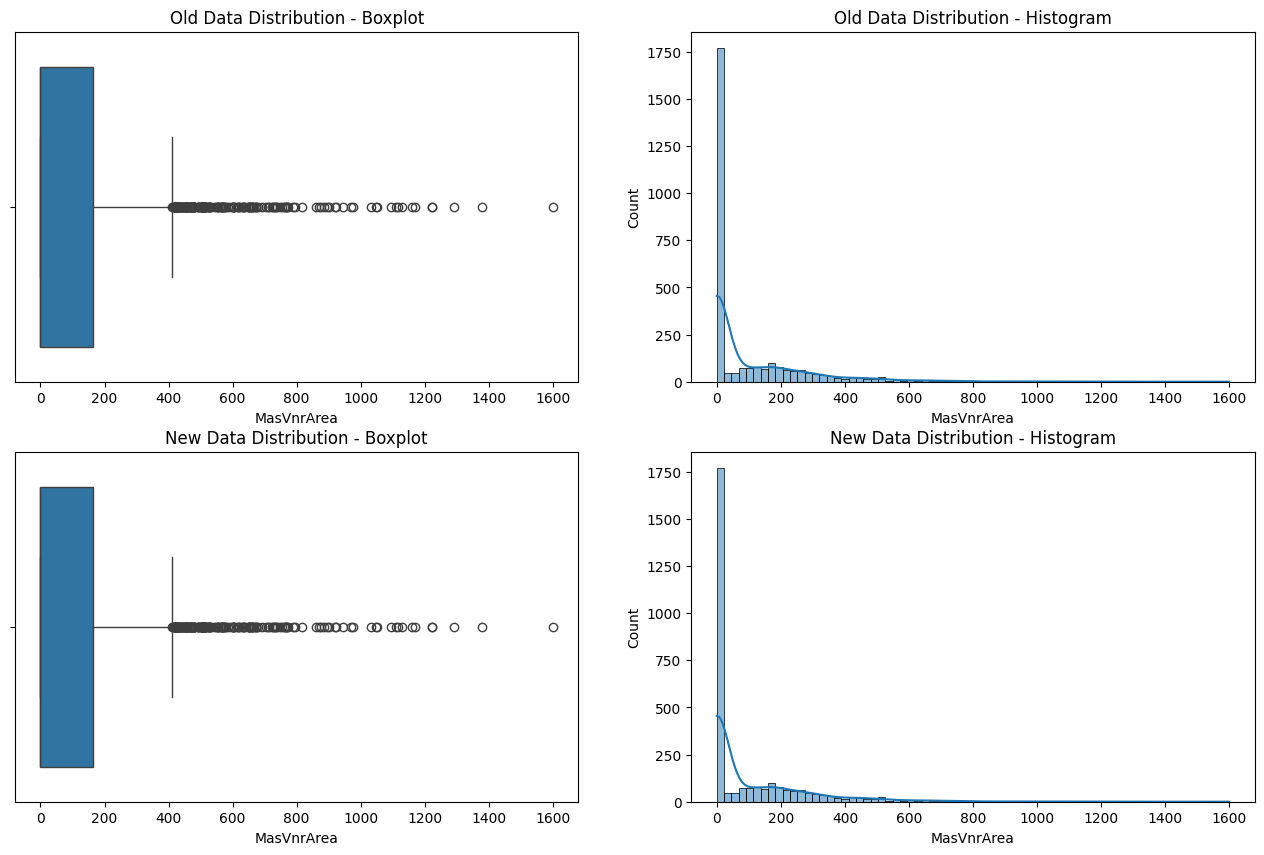

In [50]:
oldNewBoxDistPlot(df, df_mvi, "MasVnrArea")

In [51]:
masVnrArea_constant = df["MasVnrArea"].mode()[0]
df_mvi["MasVnrArea"] = df_mvi["MasVnrArea"].fillna(masVnrArea_constant)
df_mvi["MasVnrArea"].isnull().sum()

0

### Handling Basement (Bsmt) Features

In [52]:
""" 
Categorical
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665

Numerical
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
"""

' \nCategorical\nBsmtQual         2.774923\nBsmtCond         2.809181\nBsmtExposure     2.809181\nBsmtFinType1     2.706406\nBsmtFinType2     2.740665\n\nNumerical\nBsmtFinSF1       0.034258\nBsmtFinSF2       0.034258\nBsmtUnfSF        0.034258\nTotalBsmtSF      0.034258\nBsmtFullBath     0.068517\nBsmtHalfBath     0.068517\n'

In [53]:
categorical_bsmt_feat = [ "BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2" ]

numerical_bsmt_feat = [ "BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"BsmtFullBath",
"BsmtHalfBath" ]

<Axes: ylabel='Id'>

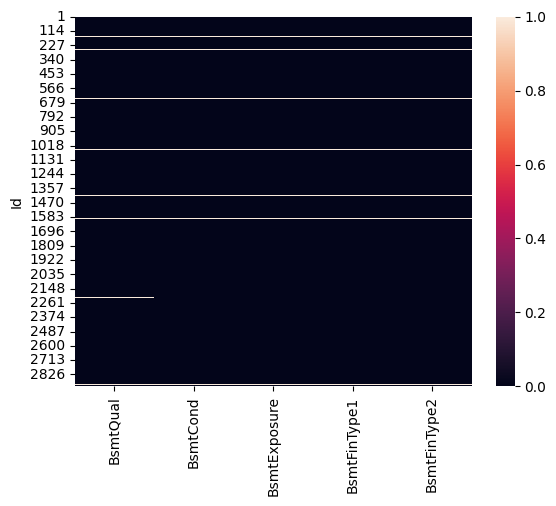

In [54]:
sns.heatmap(df[categorical_bsmt_feat].isnull())

In [55]:
for feat in categorical_bsmt_feat:
    print(f"Value count for {feat}: {df[feat].value_counts()}")

Value count for BsmtQual: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
Value count for BsmtCond: BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
Value count for BsmtExposure: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
Value count for BsmtFinType1: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
Value count for BsmtFinType2: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [56]:
bsmt_constant = "NA"
for feat in categorical_bsmt_feat:
    df_mvi[feat] = df_mvi[feat].fillna(bsmt_constant)

In [57]:
df_mvi[categorical_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

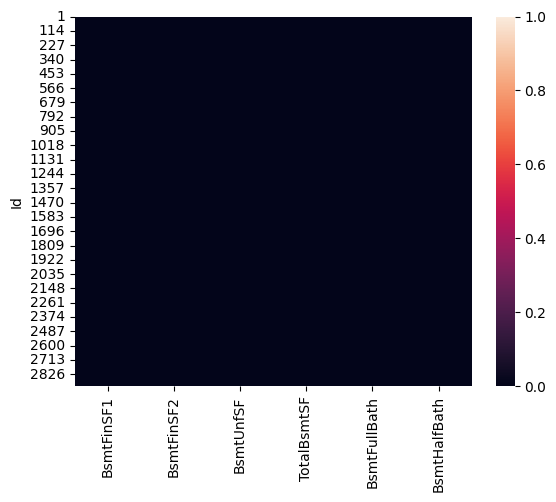

In [58]:
sns.heatmap(df[numerical_bsmt_feat].isnull())

In [59]:
df_bsmt = df[categorical_bsmt_feat + numerical_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis = 1)]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
Id                                                                          
18        NaN      NaN          NaN          NaN          NaN         0.0   
40        NaN      NaN          NaN          NaN          NaN         0.0   
91        NaN      NaN          NaN          NaN          NaN         0.0   
103       NaN      NaN          NaN          NaN          NaN         0.0   
157       NaN      NaN          NaN          NaN          NaN         0.0   
183       NaN      NaN          NaN          NaN          NaN         0.0   
260       NaN      NaN          NaN          NaN          NaN         0.0   
333        Gd       TA           No          GLQ          NaN      1124.0   
343       NaN      NaN          NaN          NaN          NaN         0.0   
363       NaN      NaN          NaN          NaN          NaN         0.0   
372       NaN      NaN          NaN          NaN          NaN         0.0   
393       NaN      NaN          NaN          NaN          NaN         0.0   
521       NaN      NaN          NaN          NaN          NaN         0.0   
533       NaN      NaN          NaN          NaN          NaN         0.0   
534       NaN      NaN          NaN          NaN          NaN         0.0   
554       NaN      NaN          NaN          NaN          NaN         0.0   
647       NaN      NaN          NaN          NaN          NaN         0.0   
706       NaN      NaN          NaN          NaN          NaN         0.0   
737       NaN      NaN          NaN          NaN          NaN         0.0   
750       NaN      NaN          NaN          NaN          NaN         0.0   
779       NaN      NaN          NaN          NaN          NaN         0.0   
869       NaN      NaN          NaN          NaN          NaN         0.0   
895       NaN      NaN          NaN          NaN          NaN         0.0   
898       NaN      NaN          NaN          NaN          NaN         0.0   
949        Gd       TA          NaN          Unf          Unf         0.0   
985       NaN      NaN          NaN          NaN          NaN         0.0   
1001      NaN      NaN          NaN          NaN          NaN         0.0   
1012      NaN      NaN          NaN          NaN          NaN         0.0   
1036      NaN      NaN          NaN          NaN          NaN         0.0   
1046      NaN      NaN          NaN          NaN          NaN         0.0   
1049      NaN      NaN          NaN          NaN          NaN         0.0   
1050      NaN      NaN          NaN          NaN          NaN         0.0   
1091      NaN      NaN          NaN          NaN          NaN         0.0   
1180      NaN      NaN          NaN          NaN          NaN         0.0   
1217      NaN      NaN          NaN          NaN          NaN         0.0   
1219      NaN      NaN          NaN          NaN          NaN         0.0   
1233      NaN      NaN          NaN          NaN          NaN         0.0   
1322      NaN      NaN          NaN          NaN          NaN         0.0   
1413      NaN      NaN          NaN          NaN          NaN         0.0   
1488       Gd       TA          NaN          Unf          Unf         0.0   
1586      NaN      NaN          NaN          NaN          NaN         0.0   
1594      NaN      NaN          NaN          NaN          NaN         0.0   
1730      NaN      NaN          NaN          NaN          NaN         0.0   
1779      NaN      NaN          NaN          NaN          NaN         0.0   
1815      NaN      NaN          NaN          NaN          NaN         0.0   
1848      NaN      NaN          NaN          NaN          NaN         0.0   
1849      NaN      NaN          NaN          NaN          NaN         0.0   
1857      NaN      NaN          NaN          NaN          NaN         0.0   
1858      NaN      NaN          NaN          NaN          NaN         0.0   
1859      NaN      NaN          NaN          NaN          NaN         0.0   
1

In [60]:
bsmt_num = 0
for feat in numerical_bsmt_feat:
    df_mvi[feat] = df_mvi[feat].fillna(bsmt_num)

In [61]:
df_mvi[numerical_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

### Handling Electrical = 0.034258 KitchenQual = 0.034258

In [62]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [63]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [64]:
df_elec_kitch2 = df[["Electrical", "KitchenQual", "KitchenAbvGr"]]
df_elec_kitch2[df_elec_kitch2.isnull().any(axis = 1)]

Electrical KitchenQual  KitchenAbvGr
Id                                       
1380        NaN          Gd             1
1556      SBrkr         NaN             1

In [65]:
electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"] = df_mvi["Electrical"].fillna(electrical_mode)
df_mvi["Electrical"].isnull().sum()

0

In [66]:
kitchenQual_mode = df["KitchenQual"].mode()[0]
# df_mvi["KitchenQual"].replace(np.nan, kitchenQual_mode, inplace= True)
df_mvi["KitchenQual"] = df_mvi["KitchenQual"].fillna(kitchenQual_mode)
df_mvi["KitchenQual"].isnull().sum()

0

### Handling remaining features
>
Functional = 0.068517, 
FireplaceQu = 48.646797,
PoolQC = 99.657417,
Fence = 80.438506,
MiscFeature = 96.402878,
SaleType = 0.034258

In [67]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [68]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [69]:
functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"] = df_mvi["Functional"].fillna(functional_mode)
df_mvi["Functional"].isnull().sum()

0

In [70]:
saleType_mode = df["SaleType"].mode()[0]
df_mvi["SaleType"] = df_mvi["SaleType"].fillna(saleType_mode)
df_mvi["SaleType"].isnull().sum()

0

In [71]:
other_categorical_feat = ["FireplaceQu",
"PoolQC",
"Fence",
"MiscFeature"]

for feat in other_categorical_feat:
    print(f"Value counts of {df[feat].value_counts()}")

Value counts of FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
Value counts of PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Value counts of Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
Value counts of MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [72]:
constant = "NA"
for feat in other_categorical_feat:
    df_mvi[feat] = df_mvi[feat].fillna(constant)
df_mvi[other_categorical_feat].isnull().sum()

FireplaceQu    0
PoolQC         0
Fence          0
MiscFeature    0
dtype: int64

### Handling Garage Features

In [73]:
# GarageType       5.378554 NA
# GarageFinish     5.447071 NA
# GarageQual       5.447071 NA
# GarageCond       5.447071 NA

# GarageYrBlt      5.447071 0
# GarageCars       0.034258 0
# GarageArea       0.034258 0

In [74]:
cat_garage_feat = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
num_garage_feat = ["GarageYrBlt", "GarageCars", "GarageArea"]

df_garage = df[cat_garage_feat + num_garage_feat]
df_garage[df_garage.isnull().any(axis = 1)]

GarageType GarageFinish GarageQual GarageCond  GarageYrBlt  GarageCars  \
Id                                                                            
40          NaN          NaN        NaN        NaN          NaN         0.0   
49          NaN          NaN        NaN        NaN          NaN         0.0   
79          NaN          NaN        NaN        NaN          NaN         0.0   
89          NaN          NaN        NaN        NaN          NaN         0.0   
90          NaN          NaN        NaN        NaN          NaN         0.0   
100         NaN          NaN        NaN        NaN          NaN         0.0   
109         NaN          NaN        NaN        NaN          NaN         0.0   
126         NaN          NaN        NaN        NaN          NaN         0.0   
128         NaN          NaN        NaN        NaN          NaN         0.0   
141         NaN          NaN        NaN        NaN          NaN         0.0   
149         NaN          NaN        NaN        NaN          NaN         0.0   
156         NaN          NaN        NaN        NaN          NaN         0.0   
164         NaN          NaN        NaN        NaN          NaN         0.0   
166         NaN          NaN        NaN        NaN          NaN         0.0   
199         NaN          NaN        NaN        NaN          NaN         0.0   
211         NaN          NaN        NaN        NaN          NaN         0.0   
242         NaN          NaN        NaN        NaN          NaN         0.0   
251         NaN          NaN        NaN        NaN          NaN         0.0   
288         NaN          NaN        NaN        NaN          NaN         0.0   
292         NaN          NaN        NaN        NaN          NaN         0.0   
308         NaN          NaN        NaN        NaN          NaN         0.0   
376         NaN          NaN        NaN        NaN          NaN         0.0   
387         NaN          NaN        NaN        NaN          NaN         0.0   
394         NaN          NaN        NaN        NaN          NaN         0.0   
432         NaN          NaN        NaN        NaN          NaN         0.0   
435         NaN          NaN        NaN        NaN          NaN         0.0   
442         NaN          NaN        NaN        NaN          NaN         0.0   
465         NaN          NaN        NaN        NaN          NaN         0.0   
496         NaN          NaN        NaN        NaN          NaN         0.0   
521         NaN          NaN        NaN        NaN          NaN         0.0   
529         NaN          NaN        NaN        NaN          NaN         0.0   
534         NaN          NaN        NaN        NaN          NaN         0.0   
536         NaN          NaN        NaN        NaN          NaN         0.0   
563         NaN          NaN        NaN        NaN          NaN         0.0   
583         NaN          NaN        NaN        NaN          NaN         0.0   
614         NaN          NaN        NaN        NaN          NaN         0.0   
615         NaN          NaN        NaN        NaN          NaN         0.0   
621         NaN          NaN        NaN        NaN          NaN         0.0   
636         NaN          NaN        NaN        NaN          NaN         0.0   
637         NaN          NaN        NaN        NaN          NaN         0.0   
639         NaN          NaN        NaN        NaN          NaN         0.0   
650         NaN          NaN        NaN        NaN          NaN         0.0   
706         NaN          NaN        NaN        NaN          NaN         0.0   
711         NaN          NaN        NaN        NaN          NaN         0.0   
739         NaN          NaN        NaN        NaN          NaN         0.0   
751         NaN          NaN        NaN        NaN          NaN         0.0   
785         NaN          NaN        NaN        NaN          NaN         0.0   
827         NaN          NaN        NaN        NaN          NaN         0.0   
844         NaN          NaN        NaN        NaN     

In [75]:
garage_const_cat = "NA"
for feat in cat_garage_feat:
    df_mvi[feat] = df_mvi[feat].fillna(garage_const_cat)
df_mvi[cat_garage_feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [76]:
garage_const_num = 0
for feat in num_garage_feat:
    df_mvi[feat] = df_mvi[feat].fillna(garage_const_num)
df_mvi[num_garage_feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

## Feature Transformation
### Coverting Numerical features to Categorical features

In [77]:
numer_conversion = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
for feat in numer_conversion:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [78]:
df_mvi[numer_conversion].head()

MSSubClass  YearBuilt  YearRemodAdd  GarageYrBlt  MoSold  YrSold
Id                                                                  
1           60       2003          2003       2003.0       2    2008
2           20       1976          1976       1976.0       5    2007
3           60       2001          2002       2001.0       9    2008
4           70       1915          1970       1998.0       2    2006
5           60       2000          2000       2000.0      12    2008

In [79]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [80]:
calendar.month_abbr[12]

'Dec'

In [81]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x: calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [82]:
for feat in numer_conversion:
    df_mvi[feat] = df_mvi[feat].astype(str)

In [83]:
for feat in numer_conversion:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


## Covert Categorical Features into Numerical Features
### Ordinal Encoding

In [84]:
ordinal_encod_var = [
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
"GarageQual",
"GarageCond",
"PoolQC",
"GarageFinish",
"Functional",
"PavedDrive",
"Utilities"
]

print("Total number of features to convert ordinal numerical format:", len(ordinal_encod_var))

Total number of features to convert ordinal numerical format: 17


In [85]:
ordinal_encod_qual1 = ["ExterQual",
"ExterCond",
"HeatingQC",
"KitchenQual"]

In [86]:
for feat in ordinal_encod_qual1:
    print(df_mvi[feat].value_counts())

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64
ExterCond
TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: count, dtype: int64
HeatingQC
Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: count, dtype: int64
KitchenQual
TA    1493
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64


In [87]:
for feat in ordinal_encod_qual1:
    df_mvi[feat] = df_mvi[feat].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered= True)).cat.codes

In [88]:
for feat in ordinal_encod_qual1:
    print(df_mvi[feat].value_counts())

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64
ExterCond
2    2538
3     299
1      67
4      12
0       3
Name: count, dtype: int64
HeatingQC
4    1493
2     857
3     474
1      92
0       3
Name: count, dtype: int64
KitchenQual
2    1493
3    1151
4     205
1      70
Name: count, dtype: int64


In [89]:
ordinal_encod_qual2 = [
"BsmtQual",
"BsmtCond",
"FireplaceQu",
"GarageQual",
"GarageCond"]

In [90]:
for feat in ordinal_encod_qual2:
    print(df_mvi[feat].value_counts())

BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
NA      81
Name: count, dtype: int64
BsmtCond
TA    2606
Gd     122
Fa     104
NA      82
Po       5
Name: count, dtype: int64
FireplaceQu
NA    1420
Gd     744
TA     592
Fa      74
Po      46
Ex      43
Name: count, dtype: int64
GarageQual
TA    2604
NA     159
Fa     124
Gd      24
Po       5
Ex       3
Name: count, dtype: int64
GarageCond
TA    2654
NA     159
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64


In [91]:
for feat in ordinal_encod_qual2:
    df_mvi[feat] = df_mvi[feat].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered= True)).cat.codes

In [92]:
for feat in ordinal_encod_qual2:
    print(df_mvi[feat].value_counts())

BsmtQual
3    1283
4    1209
5     258
2      88
0      81
Name: count, dtype: int64
BsmtCond
3    2606
4     122
2     104
0      82
1       5
Name: count, dtype: int64
FireplaceQu
0    1420
4     744
3     592
2      74
1      46
5      43
Name: count, dtype: int64
GarageQual
3    2604
0     159
2     124
4      24
1       5
5       3
Name: count, dtype: int64
GarageCond
3    2654
0     159
2      74
4      15
1      14
5       3
Name: count, dtype: int64


In [93]:
ordinal_encod_qual3 = [
"BsmtFinType1",
"BsmtFinType2"
]

In [94]:
for feat in ordinal_encod_qual3:
    print(df_mvi[feat].value_counts())

BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NA      79
Name: count, dtype: int64
BsmtFinType2
Unf    2493
Rec     105
LwQ      87
NA       80
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [95]:
for feat in ordinal_encod_qual3:
    df_mvi[feat] = df_mvi[feat].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered= True)).cat.codes

In [96]:
for feat in ordinal_encod_qual3:
    print(df_mvi[feat].value_counts())

BsmtFinType1
1    851
6    849
5    429
3    288
4    269
2    154
0     79
Name: count, dtype: int64
BsmtFinType2
1    2493
3     105
2      87
0      80
4      68
5      52
6      34
Name: count, dtype: int64


In [97]:
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA", "No", "Mn", "Av", "Gd"], ordered= True)).cat.codes
df_mvi["PoolQC"] = df_mvi["PoolQC"].astype(CategoricalDtype(categories=["NA", "Fa", "TA", "Gd", "Ex"], ordered= True)).cat.codes
df_mvi["GarageFinish"] = df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["NA", "Unf", "RFn", "Fin"], ordered= True)).cat.codes
df_mvi["Functional"] = df_mvi["Functional"].astype(CategoricalDtype(categories=["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], ordered= True)).cat.codes
df_mvi["PavedDrive"] = df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N", "P", "Y"], ordered= True)).cat.codes
df_mvi["Utilities"] = df_mvi["Utilities"].astype(CategoricalDtype(categories=["ELO", "NoSeWa", "NoSewr", "AllPub"], ordered= True)).cat.codes

### One Hot Encoding for Nominal Categorical Data

In [98]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [99]:
df_encode = df_mvi.copy()

object_features = df_encode.select_dtypes(include= "object").columns.tolist()
print("Total object data type features: ", len(object_features))

print("Features: \n", object_features)

Total object data type features:  32
Features: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [100]:
# 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'

In [101]:
df_encode[object_features].head(2)

MSSubClass MSZoning Street Alley LotShape LandContour LotConfig LandSlope  \
Id                                                                             
1          60       RL   Pave    NA      Reg         Lvl    Inside       Gtl   
2          20       RL   Pave    NA      Reg         Lvl       FR2       Gtl   

   Neighborhood Condition1 Condition2 BldgType HouseStyle YearBuilt  \
Id                                                                    
1       CollgCr       Norm       Norm     1Fam     2Story      2003   
2       Veenker      Feedr       Norm     1Fam     1Story      1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                      
1          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2          1976     Gable  CompShg     MetalSd     MetalSd    BrkFace   

   Foundation Heating CentralAir Electrical GarageType GarageYrBlt Fence  \
Id                                                                         
1       PConc    GasA          Y      SBrkr     Attchd      2003.0    NA   
2      CBlock    GasA          Y      SBrkr     Attchd      1976.0    NA   

   MiscFeature MoSold YrSold SaleType SaleCondition  
Id                                                   
1           NA    Feb   2008       WD        Normal  
2           NA    May   2007       WD        Normal

In [102]:
print("Shape of df before encoding: ", df_encode.shape)

df_encode = pd.get_dummies(df_encode, 
                           columns = object_features, 
                           prefix = object_features, 
                           drop_first = True)

print("Shape of df after encoding: ", df_encode.shape)

Shape of df before encoding:  (2919, 80)
Shape of df after encoding:  (2919, 512)


In [103]:
df_encode.select_dtypes(include= "object").columns.tolist()

[]

## Split Data for training and testing

In [104]:
df_encode.shape

(2919, 512)

In [105]:
len_train = df_train.shape[0]
len_train

1460

In [127]:
x_train = df_encode[:len_train].drop("SalePrice", axis= 1)
y_train = df_encode["SalePrice"][:len_train]
x_test = df_encode[len_train:].drop("SalePrice", axis= 1)

print("Shape of x_train = ", x_train.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of x_test = ", x_test.shape)

Shape of x_train =  (1460, 511)
Shape of y_train =  (1460,)
Shape of x_test =  (1459, 511)


## Feature Scaling

In [128]:
# scaler = StandardScaler()
# scaler.fit(x_train)

# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

In [129]:
# x_train[:3, :]

## Train ML Model

In [130]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.isotonic import IsotonicRegression

from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV

In [131]:
# # Initialize models with parameters if necessary
# lr = LinearRegression()
# svr = SVR()
# sgdr = SGDRegressor()  # Increased max_iter and set tolerance
# knr = KNeighborsRegressor()
# gpr = GaussianProcessRegressor()
# dtr = DecisionTreeRegressor()
# gbr = GradientBoostingRegressor()
# rfr = RandomForestRegressor()
# xgbr = XGBRegressor()

# mlpr = MLPRegressor(max_iter=5000, tol=1e-4, learning_rate_init=0.0001, random_state=45, solver='adam', early_stopping=True)
# mlpr_pipeline = make_pipeline(StandardScaler(), mlpr)

# # Transform x_train to 1D if using IsotonicRegression
# # x_train_1d = np.mean(x_train, axis=1).reshape(-1, 1)
# # ir = IsotonicRegression()

In [133]:
# models = {
#     "a": ["LinearRegression", lr],
#     "b": ["SVR", svr],
#     "c": ["SGDRegressor", sgdr],
#     "d": ["KNeighborsRegressor", knr],
#     "e": ["GaussianProcessRegressor", gpr],
#     "f": ["DecisionTreeRegressor", dtr],
#     "g": ["GradientBoostingRegressor", gbr],
#     "h": ["RandomForestRegressor", rfr],
#     "i": ["XGBRegressor", xgbr],
#     "j": ["MLPRegressor", mlpr_pipeline]
# }

In [134]:
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.metrics import make_scorer, r2_score

# def test_model(model, x_train, y_train):
#     cv = KFold(n_splits=7, shuffle=True, random_state=45)
#     r2 = make_scorer(r2_score)
#     r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring=r2)
#     score = [r2_val_score.mean()]
#     return score

In [135]:
# models_score = []
# for model in models:
#     print("Training model: ", models[model][0])
#     score = test_model(models[model][1], x_train, y_train)
#     print("Score of model: ", score)
#     models_score.append([models[model][0], score[0]])

# print("Model scores: ", models_score)

In [136]:
# Assuming your data is in DataFrame x_train
x_train = pd.DataFrame(x_train)  # if not already a DataFrame

# Check for missing values
missing_values = x_train.isnull().sum()

# Display columns with missing values
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 LotFrontage              0
LotArea                  0
Utilities                0
OverallQual              0
OverallCond              0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
HeatingQC                0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
KitchenQual              0
TotRmsAbvGrd             0
Functional               0
Fireplaces               0
FireplaceQu              0
GarageFinish             0
GarageCars               0
GarageArea             

## Feature Scaling

In [137]:
# Assuming x_train is your training data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

## Hyperparameter Tuning

### For SVR

In [141]:
# Initialize the SVR
svr = SVR()

# Define the hyperparameters grid for SVR
parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svr, parameters, cv=5, scoring='r2')
grid_search.fit(x_train_scaled, y_train)
best_svr = grid_search.best_estimator_

print("Best parameters for SVR: ", grid_search.best_params_)

Best parameters for SVR:  {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


### SDGRegressor

In [144]:
# # Initialize the SGDRegressor
# sgdr = SGDRegressor()

# # Define the hyperparameters grid
# param_grid = {
#     'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'alpha': [0.0001, 0.001, 0.01, 0.1],
#     'max_iter': [50000, 70000, 90000],  # Increase the number of iterations
#     'tol': [1e-3, 1e-4, 1e-5],
#     'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
#     'eta0': [0.001, 0.01, 0.1, 1]
# }

# # Perform GridSearchCV
# grid_search_sgdr = GridSearchCV(sgdr, param_grid, cv=5, scoring='r2')
# grid_search_sgdr.fit(x_train_scaled, y_train)
# best_sgdr = grid_search_sgdr.best_estimator_

# print("Best parameters for SGDRegressor: ", grid_search_sgdr.best_params_)

### KNeighborsRegressor

In [145]:
# Initialize the KNeighborsRegressor
knr = KNeighborsRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform GridSearchCV
grid_search_knr = GridSearchCV(knr, param_grid, cv=5, scoring='r2')
grid_search_knr.fit(x_train_scaled, y_train)
best_knr = grid_search_knr.best_estimator_

print("Best parameters for KNeighborsRegressor: ", grid_search_knr.best_params_)

Best parameters for KNeighborsRegressor:  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


### GaussianProcessRegressor

In [152]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from sklearn.gaussian_process.kernels import Matern

# Initialize the GaussianProcessRegressor
gpr = GaussianProcessRegressor()

# Define the kernel and hyperparameters grid
param_grid = {
    'kernel': [
        C(1.0, (1e-3, 1e10)) * RBF(1.0, (1e-5, 1e5)),  # Increased bounds
        C(1.0, (1e-3, 1e10)) * Matern(length_scale=1.0, length_scale_bounds=(1e-5, 1e5)),  # Matern kernel with increased bounds
        C(1.0, (1e-3, 1e10)) * RBF(1.0, (1e-5, 1e5)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-5, 1e5))  # WhiteKernel added
    ],
    'alpha': [1e-10, 1e-3, 1e-1, 1.0],
    'n_restarts_optimizer': [0, 1, 5, 10]  # Number of restarts for the optimizer
}

# Perform GridSearchCV
grid_search_gpr = GridSearchCV(gpr, param_grid, cv=5, scoring='r2')
grid_search_gpr.fit(x_train_scaled, y_train)
best_gpr = grid_search_gpr.best_estimator_

print("Best parameters for GaussianProcessRegressor: ", grid_search_gpr.best_params_)

C:\Users\KIIT01\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000000000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\KIIT01\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10000000000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\KIIT01\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better

KeyboardInterrupt: 

### DecisionTreeRegressor

In [153]:
# Initialize the DecisionTreeRegressor
dtr = DecisionTreeRegressor()

# Define the hyperparameters grid
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],  # The function to measure the quality of a split
    'splitter': ['best', 'random'],  # Strategy used to choose the split at each node
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Perform GridSearchCV
grid_search_dtr = GridSearchCV(dtr, param_grid, cv=5, scoring='r2')
grid_search_dtr.fit(x_train_scaled, y_train)
best_dtr = grid_search_dtr.best_estimator_

print("Best parameters for DecisionTreeRegressor: ", grid_search_dtr.best_params_)

Best parameters for DecisionTreeRegressor:  {'criterion': 'friedman_mse', 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}


C:\Users\KIIT01\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT01\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT01\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\KIIT01\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklea

### GradientBoostingRegressor

In [ ]:
# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting individual base learners
}

# Perform GridSearchCV
grid_search_gbr = GridSearchCV(gbr, param_grid, cv=5, scoring='r2')
grid_search_gbr.fit(x_train_scaled, y_train)
best_gbr = grid_search_gbr.best_estimator_

print("Best parameters for GradientBoostingRegressor: ", grid_search_gbr.best_params_)

### RandomForestRegressor

In [ ]:
# Initialize the RandomForestRegressor
rfr = RandomForestRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Perform GridSearchCV
grid_search_rfr = GridSearchCV(rfr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_rfr.fit(x_train_scaled, y_train)
best_rfr = grid_search_rfr.best_estimator_

print("Best parameters for RandomForestRegressor: ", grid_search_rfr.best_params_)

### XGBRegressor

In [ ]:
# Initialize the XGBRegressor
xgbr = XGBRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size at each iteration while moving toward a minimum
    'max_depth': [3, 5, 7],  # Maximum depth of the trees
    'min_child_weight': [1, 5, 10],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features to be used for each tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition on a leaf node
}

# Perform GridSearchCV
grid_search_xgbr = GridSearchCV(xgbr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_xgbr.fit(x_train_scaled, y_train)
best_xgbr = grid_search_xgbr.best_estimator_

print("Best parameters for XGBRegressor: ", grid_search_xgbr.best_params_)

### MLPRegressor

In [ ]:
# Initialize the MLPRegressor
mlpr = MLPRegressor(max_iter=5000, random_state=45, solver='adam', early_stopping=True)

# Define the hyperparameters grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Number of neurons in each hidden layer
    'activation': ['relu', 'tanh', 'logistic'],  # Activation function for hidden layers
    'solver': ['adam', 'lbfgs', 'sgd'],  # The solver for weight optimization
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term)
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule
    'learning_rate_init': [0.001, 0.01, 0.1]  # Initial learning rate used
}

# Perform GridSearchCV
grid_search_mlpr = GridSearchCV(mlpr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_mlpr.fit(x_train_scaled, y_train)
best_mlpr = grid_search_mlpr.best_estimator_

print("Best parameters for MLPRegressor: ", grid_search_mlpr.best_params_)

### Model Testing Function

In [ ]:
def test_model(model, x_train, y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring=r2)
    score = r2_val_score.mean()
    return score

In [ ]:
# Test the tuned models
best_lr_score = test_model(lr, x_train_scaled, y_train)
print("Best LinearRegression Score: ", best_lr_score)

best_svr_score = test_model(best_svr, x_train_scaled, y_train)
print("Best SVR Score: ", best_svr_score)

best_sgdr_score = test_model(best_sgdr, x_train_scaled, y_train)
print("Best SGDRegressor Score: ", best_sgdr_score)

best_knr_score = test_model(best_knr, x_train_scaled, y_train)
print("Best KNeighborsRegressor Score: ", best_knr_score)

best_gpr_score = test_model(best_gpr, x_train_scaled, y_train)
print("Best GaussianProcessRegressor Score: ", best_gpr_score)

best_dtr_score = test_model(best_dtr, x_train_scaled, y_train)
print("Best DecisionTreeRegressor Score: ", best_dtr_score)

best_gbr_score = test_model(best_gbr, x_train_scaled, y_train)
print("Best GradientBoostingRegressor Score: ", best_gbr_score)

best_rfr_score = test_model(best_rfr, x_train_scaled, y_train)
print("Best RandomForestRegressor Score: ", best_rfr_score)

best_xgbr_score = test_model(best_xgbr, x_train_scaled, y_train)
print("Best XGBRegressor Score: ", best_xgbr_score)

best_mlpr_score = test_model(best_mlpr, x_train_scaled, y_train)
print("Best MLPRegressor Score: ", best_mlpr_score)

In [ ]:
# Initialize models with scaled data
models = {
    "a": ["LinearRegression", lr],
    "b": ["SVR", best_svr],
    "c": ["SGDRegressor", best_sgdr],  # Use tuned SGDRegressor
    "d": ["KNeighborsRegressor", best_knr],  # Use tuned KNeighborsRegressor
    "e": ["GaussianProcessRegressor", best_gpr],  # Use tuned GaussianProcessRegressor
    "f": ["DecisionTreeRegressor", best_dtr],  # Use tuned DecisionTreeRegressor
    "g": ["GradientBoostingRegressor", best_gbr],  # Use tuned GradientBoostingRegressor
    "h": ["RandomForestRegressor", best_rfr],  # Use tuned RandomForestRegressor
    "i": ["XGBRegressor", best_xgbr],  # Use tuned XGBRegressor
    "j": ["MLPRegressor", best_mlpr]  # Use tuned MLPRegressor
}


# Test models with scaled data
models_score = []
for model_key in models:
    model_name, model_instance = models[model_key]
    print(f"Training model: {model_name}")
    score = test_model(model_instance, x_train_scaled, y_train)
    print(f"Score of model: {score}")
    models_score.append([model_name, score])

print("Model scores: ", models_score)